# Classification

In [69]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import pandas as pd

In [46]:
primary_key = ['dialog_id', 'speaker', 'da_tag', 'start_time', 'end_time']

## Load Data

In [41]:
text_train = pd.read_csv('../features/train_text_features.csv', index_col=0)
text_test = pd.read_csv('../features/test_text_features.csv', index_col=0)

In [42]:
speech_train = pd.read_csv('../features/train_speech_features.csv', index_col=0)
speech_test = pd.read_csv('../features/test_speech_features.csv', index_col=0)

In [43]:
text_speech_train = pd.read_csv('../features/train_features.csv', index_col=0)
text_speech_test = pd.read_csv('../features/test_features.csv', index_col=0)

## Compare Models

### Decision Tree

In [64]:
def train_dt_classifier(train, test):
    clf = tree.DecisionTreeClassifier()
    clf.fit(train.drop(primary_key, axis=1), train['da_tag'])

    preds = clf.predict(test.drop(primary_key, axis=1))
    labels = test['da_tag']
                        
    print('F1 score:', f1_score(labels, preds, average='macro'))
    print('Accuracy:', accuracy_score(labels, preds))
    
    cm = confusion_matrix(labels, preds, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    plt.show()

F1 score: 0.5249337730850518
Accuracy: 0.7592543974796534


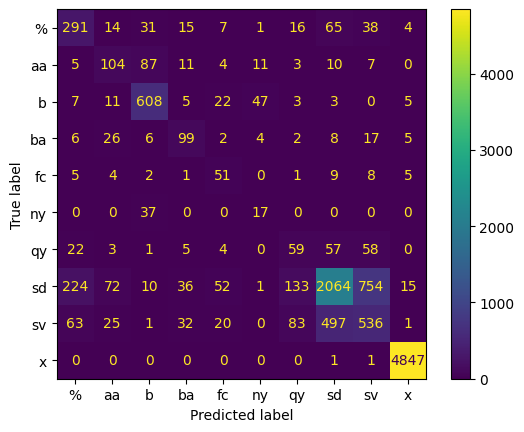

In [65]:
train_dt_classifier(text_train, text_test)

F1 score: 0.1854166908369045
Accuracy: 0.41562832029363467


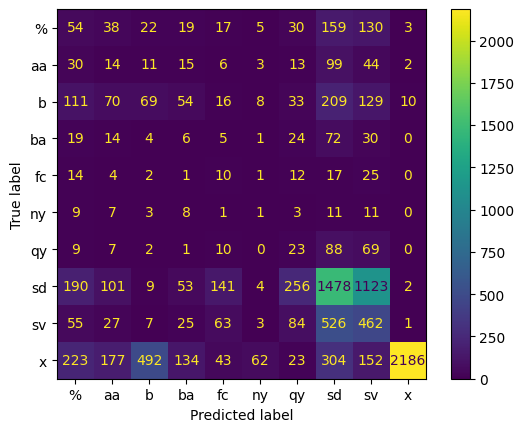

In [66]:
train_dt_classifier(speech_train, speech_test)

F1 score: 0.37166958186067933
Accuracy: 0.652081522264078


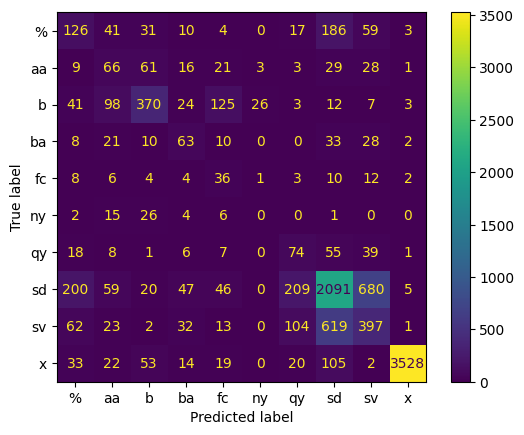

In [67]:
train_dt_classifier(text_speech_train, text_speech_test)

### SVM

In [70]:
def train_svm_classifier(train, test):
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    clf.fit(train.drop(primary_key, axis=1), train['da_tag'])

    preds = clf.predict(test.drop(primary_key, axis=1))
    labels = test['da_tag']
                        
    print('F1 score:', f1_score(labels, preds, average='macro'))
    print('Accuracy:', accuracy_score(labels, preds))
    
    cm = confusion_matrix(labels, preds, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    plt.show()

F1 score: 0.5574581103314656
Accuracy: 0.7808698696070709


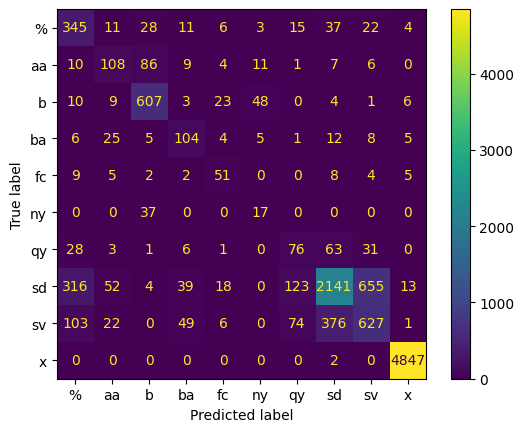

In [71]:
train_svm_classifier(text_train, text_test)

F1 score: 0.09192146971157258
Accuracy: 0.29527673138220806


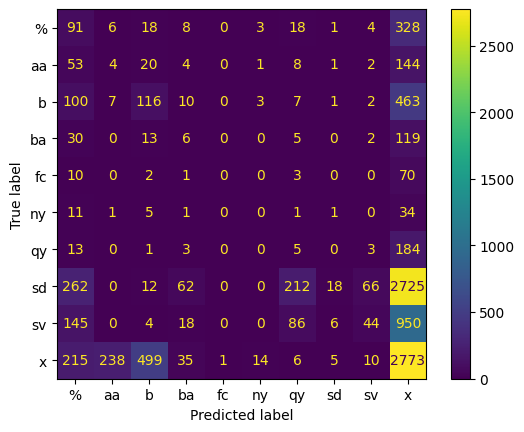

In [72]:
train_svm_classifier(speech_train, speech_test)

F1 score: 0.4686202443246141
Accuracy: 0.6927460639428185


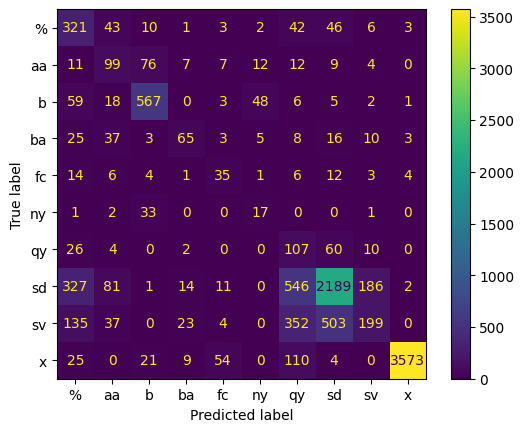

In [73]:
train_svm_classifier(text_speech_train, text_speech_test)

### Random Forest

In [36]:
def train_rf_classifier(train, test):
    clf = RandomForestClassifier()
    clf.fit(train.drop(primary_key, axis=1), train['da_tag'])

    preds = clf.predict(test.drop(primary_key, axis=1))
    labels = test['da_tag']
                        
    print('F1 score:', f1_score(labels, preds, average='macro'))
    print('Accuracy:', accuracy_score(labels, preds))
    
    cm = confusion_matrix(labels, preds, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    plt.show()

F1 score: 0.6134022496822071
Accuracy: 0.8213879408418657


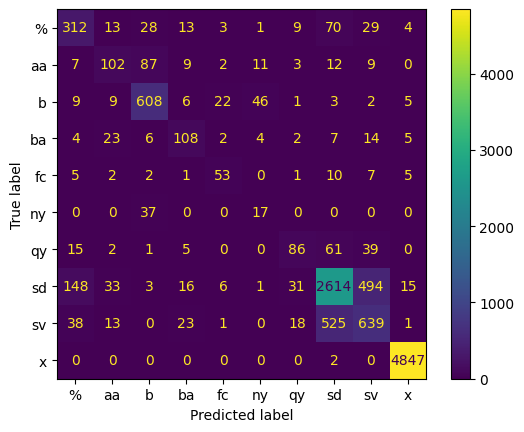

In [55]:
train_rf_classifier(text_train, text_test)

F1 score: 0.20023507471211194
Accuracy: 0.5651501980102386


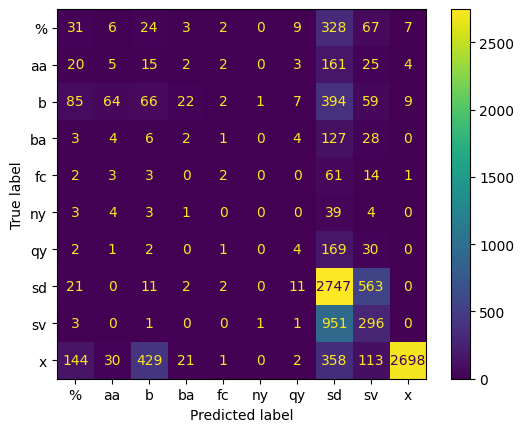

In [44]:
train_rf_classifier(speech_train, speech_test)

F1 score: 0.598137905274913
Accuracy: 0.8074954119578867


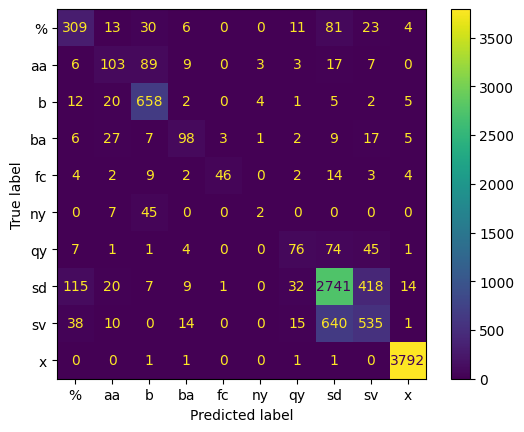

In [45]:
train_rf_classifier(text_speech_train, text_speech_test)